# 1. Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
from numpy import asarray
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import glob
import os 
import random
import subprocess
import matplotlib.pyplot as plt
from skimage.io import imread
from matplotlib.patches import Rectangle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# 2. Importing Dataset

In [2]:
image_list_other = []
image_list_safe = []
image_list_talking = []
image_list_text = []
image_list_turn = []


for other in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities"): 
    if other.endswith(".png") or other.endswith(".jpg"): 
        image_list_other.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities",
                                             other))
        
        
for safe in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/safe_driving"): 
    if safe.endswith(".png") or safe.endswith(".jpg"): 
        image_list_safe.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/safe_driving", 
                                            safe))
     
        
for talking in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/talking_phone"): 
    if talking.endswith(".png") or talking.endswith(".jpg"): 
        image_list_talking.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/talking_phone", 
                                               talking))
       
        
for text in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/texting_phone"): 
    if text.endswith(".png") or text.endswith(".jpg"): 
        image_list_text.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/texting_phone",
                                            text))
     
        
for turn in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/turning"): 
    if turn.endswith(".png") or turn.endswith(".jpg"): 
        image_list_turn.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/turning",
                                            turn))
       
    

## 2.1. Data Preprocessing

In [3]:
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_79.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_4664.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_7973.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_13318.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_13396.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_13541.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_13625.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_20398.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_22266.jpg')

image_list_turn.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_8771.jpg')
image_list_turn.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_62337.jpg')
image_list_turn.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_67523.jpg')
image_list_turn.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_70552.jpg')
image_list_turn.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_84605.jpg')
image_list_turn.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_101434.jpg')

In [4]:
font = {'family':'Times New Roman','color':'#000000'}
background_color = '#38b5c9'

## 2.2. Plot random images from each class

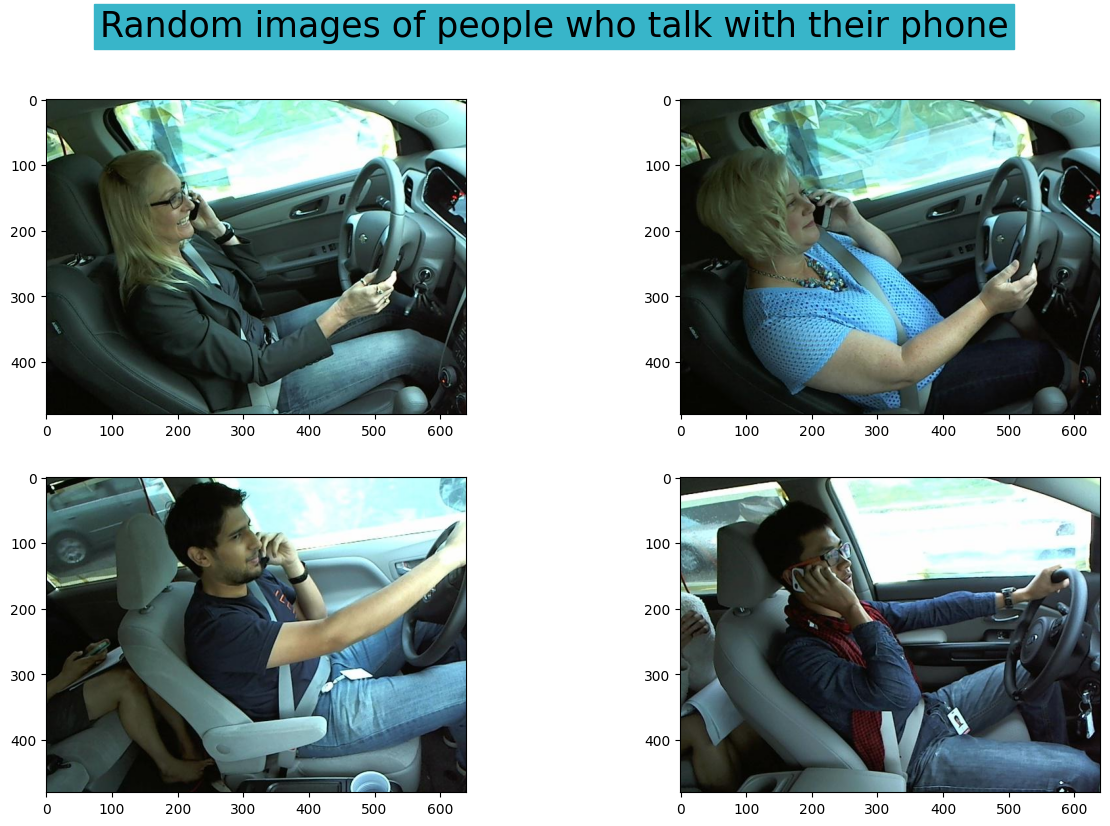

In [5]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_talking)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who talk with their phone",
                 fontdict = font, fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

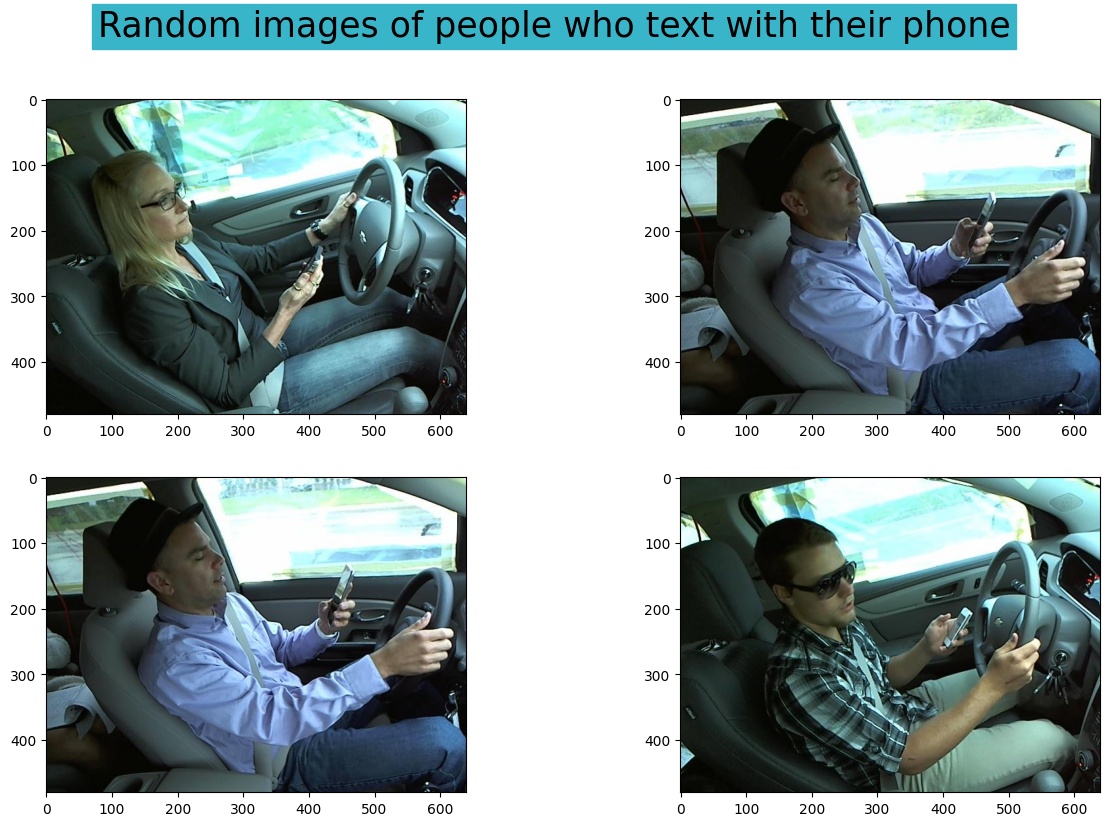

In [6]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_text)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who text with their phone",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

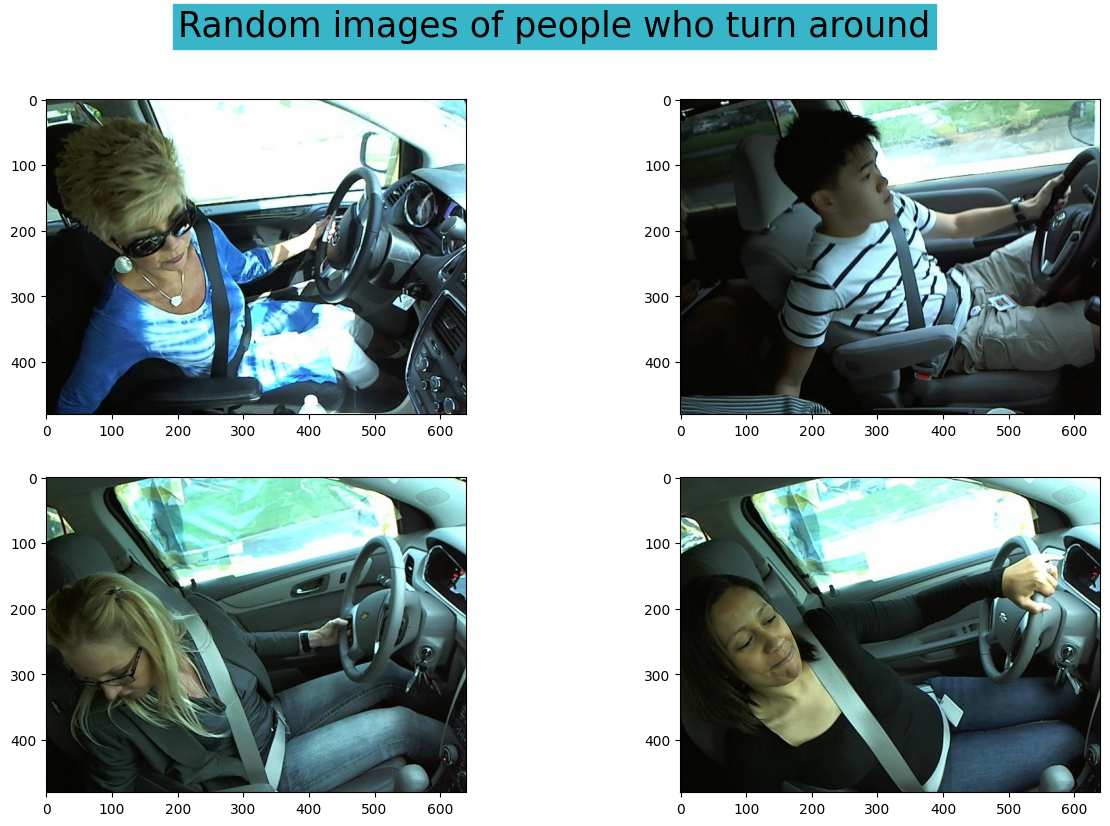

In [7]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_turn)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who turn around",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

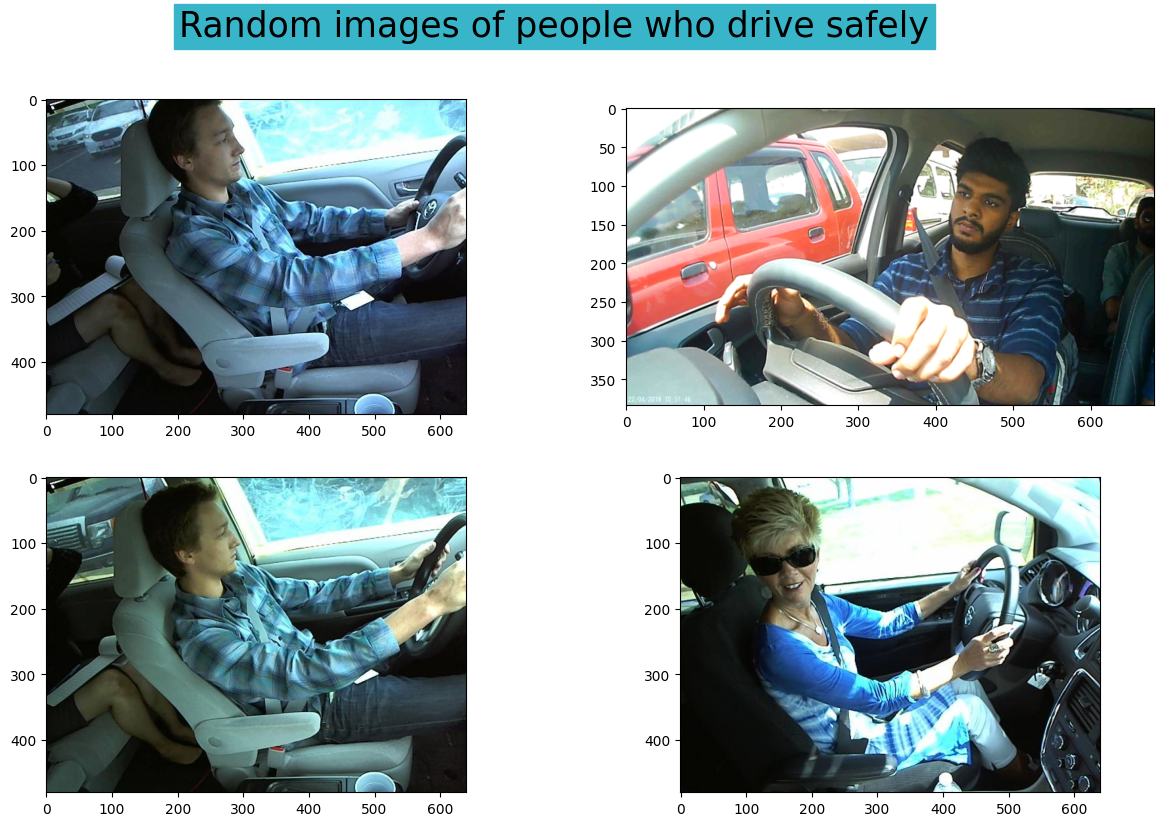

In [8]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_safe)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who drive safely",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

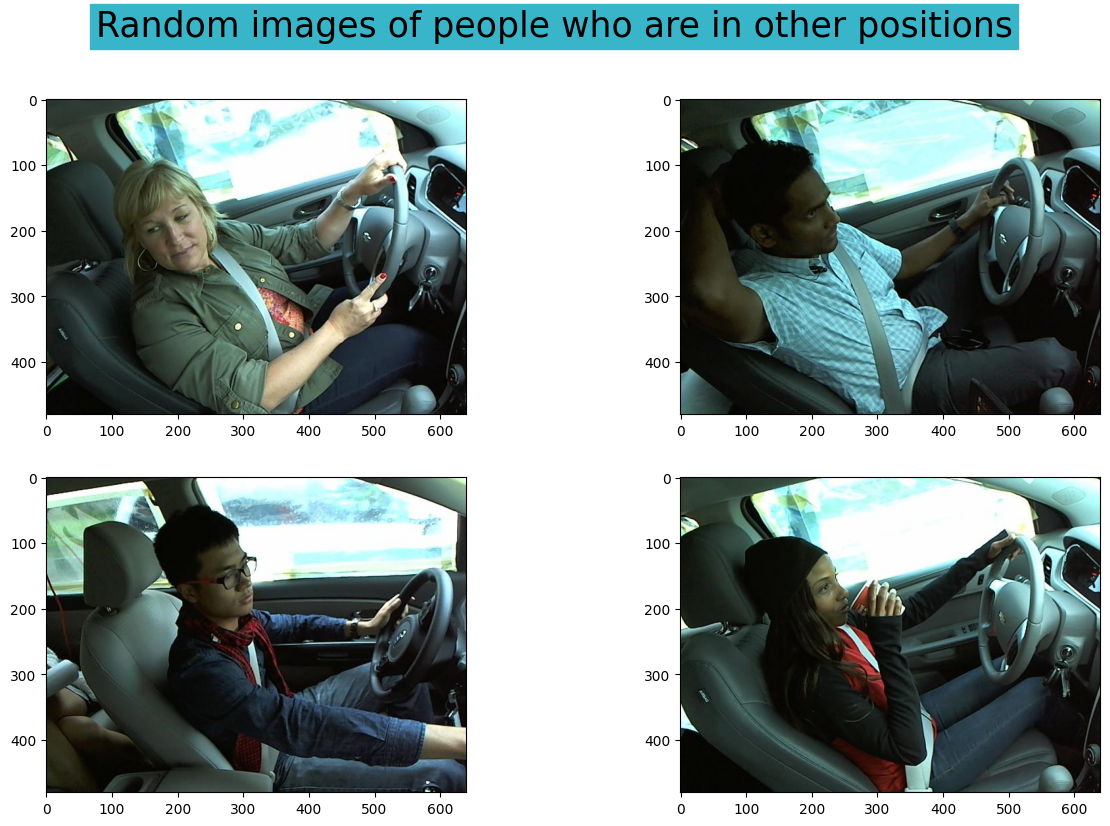

In [9]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_other)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who are in other positions",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

## 2.3. Data Splitting

In [10]:
print("Number of samples in (Class = Other) = " ,len(image_list_other))
print("Number of samples in (Class = Safe Driving) = " ,len(image_list_safe))
print("Number of samples in (Class = Talking Phone) = " ,len(image_list_talking))
print("Number of samples in (Class = Texting Phone) = " ,len(image_list_text))
print("Number of samples in (Class = Turning) = " ,len(image_list_turn))

Number of samples in (Class = Other) =  2119
Number of samples in (Class = Safe Driving) =  2203
Number of samples in (Class = Talking Phone) =  2169
Number of samples in (Class = Texting Phone) =  2203
Number of samples in (Class = Turning) =  2057


In [11]:
print(.75*len(image_list_other) , .2*len(image_list_other) ,.05*len(image_list_other))
print(.75*len(image_list_safe) , .2*len(image_list_safe) ,.05*len(image_list_safe))
print(.75*len(image_list_talking) , .2*len(image_list_talking) ,.05*len(image_list_talking))
print(.75*len(image_list_text) , .2*len(image_list_text) ,.05*len(image_list_text))
print(.75*len(image_list_turn) , .2*len(image_list_turn) ,.05*len(image_list_turn))

1589.25 423.8 105.95
1652.25 440.6 110.15
1626.75 433.8 108.45
1652.25 440.6 110.15
1542.75 411.40000000000003 102.85000000000001


In [12]:
print("Train","Test", "Valid")

train_other = image_list_other[:1589]
test_other = image_list_other[1589:2012]
valid_other = image_list_other[2012:]

print (len(train_other), len(test_other), len(valid_other))

train_safe = image_list_safe[:1652]
test_safe = image_list_safe[1652:2092]
valid_safe = image_list_safe[2092:]

print (len(train_safe), len(test_safe), len(valid_safe))

train_talking = image_list_talking[:1626]
test_talking = image_list_talking[1626:2059]
valid_talking = image_list_talking[2059:]

print (len(train_talking), len(test_talking), len(valid_talking))

train_text = image_list_text[:1652]
test_text = image_list_text[1652:2092]
valid_text = image_list_text[2092:]

print (len(train_text), len(test_text), len(valid_text))

train_turn = image_list_turn[:1547]
test_turn = image_list_turn[1547:1959]
valid_turn = image_list_turn[1959:]

print (len(train_turn), len(test_turn), len(valid_turn))

Train Test Valid
1589 423 107
1652 440 111
1626 433 110
1652 440 111
1547 412 98


## 2.4. Creating Dataframes

In [13]:
train_other_df = pd.DataFrame({'image':train_other, 'label':'Other'})
train_safe_df = pd.DataFrame({'image':train_safe, 'label':'Safe'})
train_talking_df = pd.DataFrame({'image':train_talking, 'label':'Talk'})
train_text_df = pd.DataFrame({'image':train_text, 'label':'Text'})
train_turn_df = pd.DataFrame({'image':train_turn, 'label':'Turn'})

In [14]:
test_other_df = pd.DataFrame({'image':test_other, 'label':'Other'})
test_safe_df = pd.DataFrame({'image':test_safe, 'label':'Safe'})
test_talking_df = pd.DataFrame({'image':test_talking, 'label':'Talk'})
test_text_df = pd.DataFrame({'image':test_text, 'label':'Text'})
test_turn_df = pd.DataFrame({'image':test_turn, 'label':'Turn'})

In [15]:
valid_other_df = pd.DataFrame({'image':valid_other, 'label':'Other'})
valid_safe_df = pd.DataFrame({'image':valid_safe, 'label':'Safe'})
valid_talking_df = pd.DataFrame({'image':valid_talking, 'label':'Talk'})
valid_text_df = pd.DataFrame({'image':valid_text, 'label':'Text'})
valid_turn_df = pd.DataFrame({'image':valid_turn, 'label':'Turn'})

In [16]:
train_df = pd.concat([train_other_df, train_safe_df, train_talking_df, train_text_df, train_turn_df])
test_df = pd.concat([test_other_df, test_safe_df, test_talking_df, test_text_df, test_turn_df])
val_df = pd.concat([valid_other_df, valid_safe_df, valid_talking_df, valid_text_df, valid_turn_df])

In [17]:
print("Number of rows in train dataframe is: ", len(train_df))
print("Number of rows in test dataframe is: ", len(test_df))
print("Number of rows in val dataframe is: ", len(val_df))

Number of rows in train dataframe is:  8066
Number of rows in test dataframe is:  2148
Number of rows in val dataframe is:  537


In [18]:
random_img_height = random.choice(train_other)

image= cv2.imread(random_img_height)

height, width= image.shape[:2]

print("The height is ", height)

print("The width is ", width)

The height is  480
The width is  640


## 2.5. Define hyperparameters

In [19]:
Batch_size = 64
Img_height = 240
Img_width = 240

## 2.6. Image rescaling

In [20]:
trainGenerator = ImageDataGenerator(rescale=1./255.)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

In [21]:
trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="categorical",
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width) #set the height and width of the images
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

valDataset = valGenerator.flow_from_dataframe(
  dataframe=val_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

Found 8066 validated image filenames belonging to 5 classes.
Found 2148 validated image filenames belonging to 5 classes.
Found 537 validated image filenames belonging to 5 classes.


# **3. AlexNet**

In [22]:
def AlexNet():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(96, 11, 4, activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(256, 5, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_Alex = models.Model(inputs=inp, outputs=x)

    return model_Alex

model_Alex = AlexNet()
model_Alex.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 58, 58, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 58, 58, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,748,805 (94.41 MB)

 Trainable params: 24,748,101 (94.41 MB)

 Non-trainable params: 704 (2.75 KB)

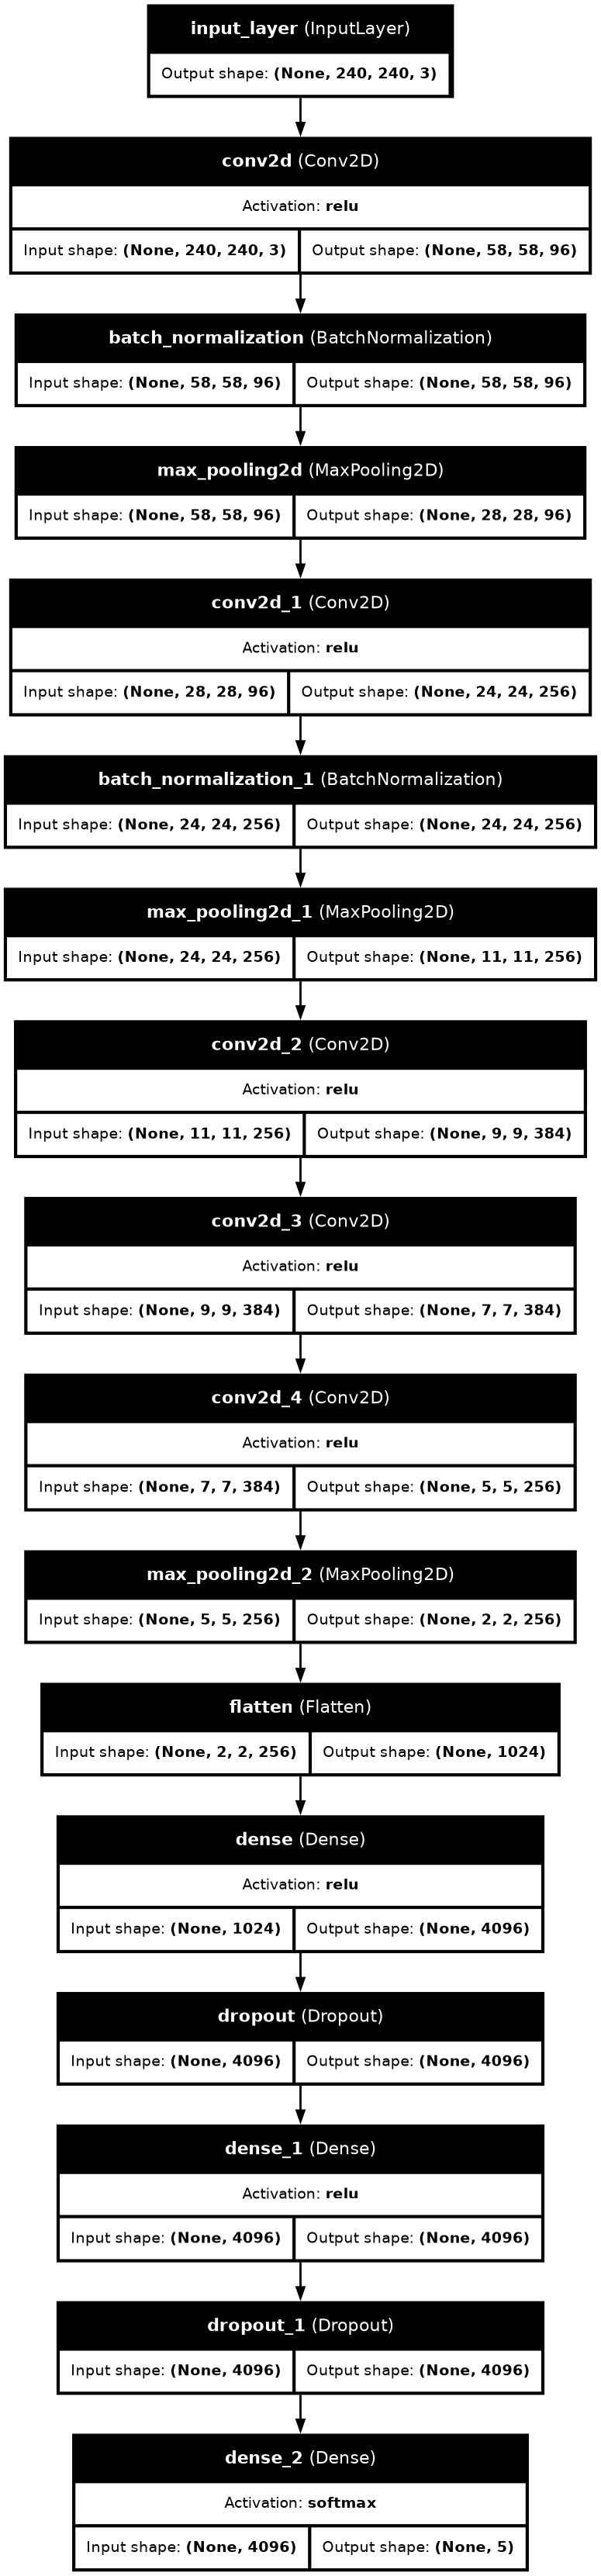

In [23]:
tf.keras.utils.plot_model(
    model_Alex,
    to_file='alex_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [24]:
model_Alex.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [65]:
Alex_model = model_Alex.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 51s 324ms/step - accuracy: 0.2994 - loss: 0.7091 - val_accuracy: 0.4488 - val_loss: 0.4448
Epoch 2/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 37s 273ms/step - accuracy: 0.6990 - loss: 0.2648 - val_accuracy: 0.6741 - val_loss: 0.2771
Epoch 3/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 38s 286ms/step - accuracy: 0.8550 - loss: 0.1501 - val_accuracy: 0.8175 - val_loss: 0.1816
Epoch 4/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 294ms/step - accuracy: 0.8840 - loss: 0.1225 - val_accuracy: 0.9181 - val_loss: 0.0880
Epoch 5/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 38s 287ms/step - accuracy: 0.9269 - loss: 0.0782 - val_accuracy: 0.8696 - val_loss: 0.1221
Epoch 6/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 38s 287ms/step - accuracy: 0.9490 - loss: 0.0551 - val_accuracy: 0.9050 - val_loss: 0.1047
Epoch 7/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 38s 284ms/step - accuracy: 0.9494 - loss: 0.0564 - val_accuracy: 0.9460 - val_loss: 0.0621
Epoch 8/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 290ms/step - accuracy: 0.9579 - loss: 0

In [66]:
training_loss_alex = Alex_model.history['loss']
val_loss_alex = Alex_model.history['val_loss']
training_acc_alex = Alex_model.history['accuracy']
val_acc_alex = Alex_model.history['val_accuracy']

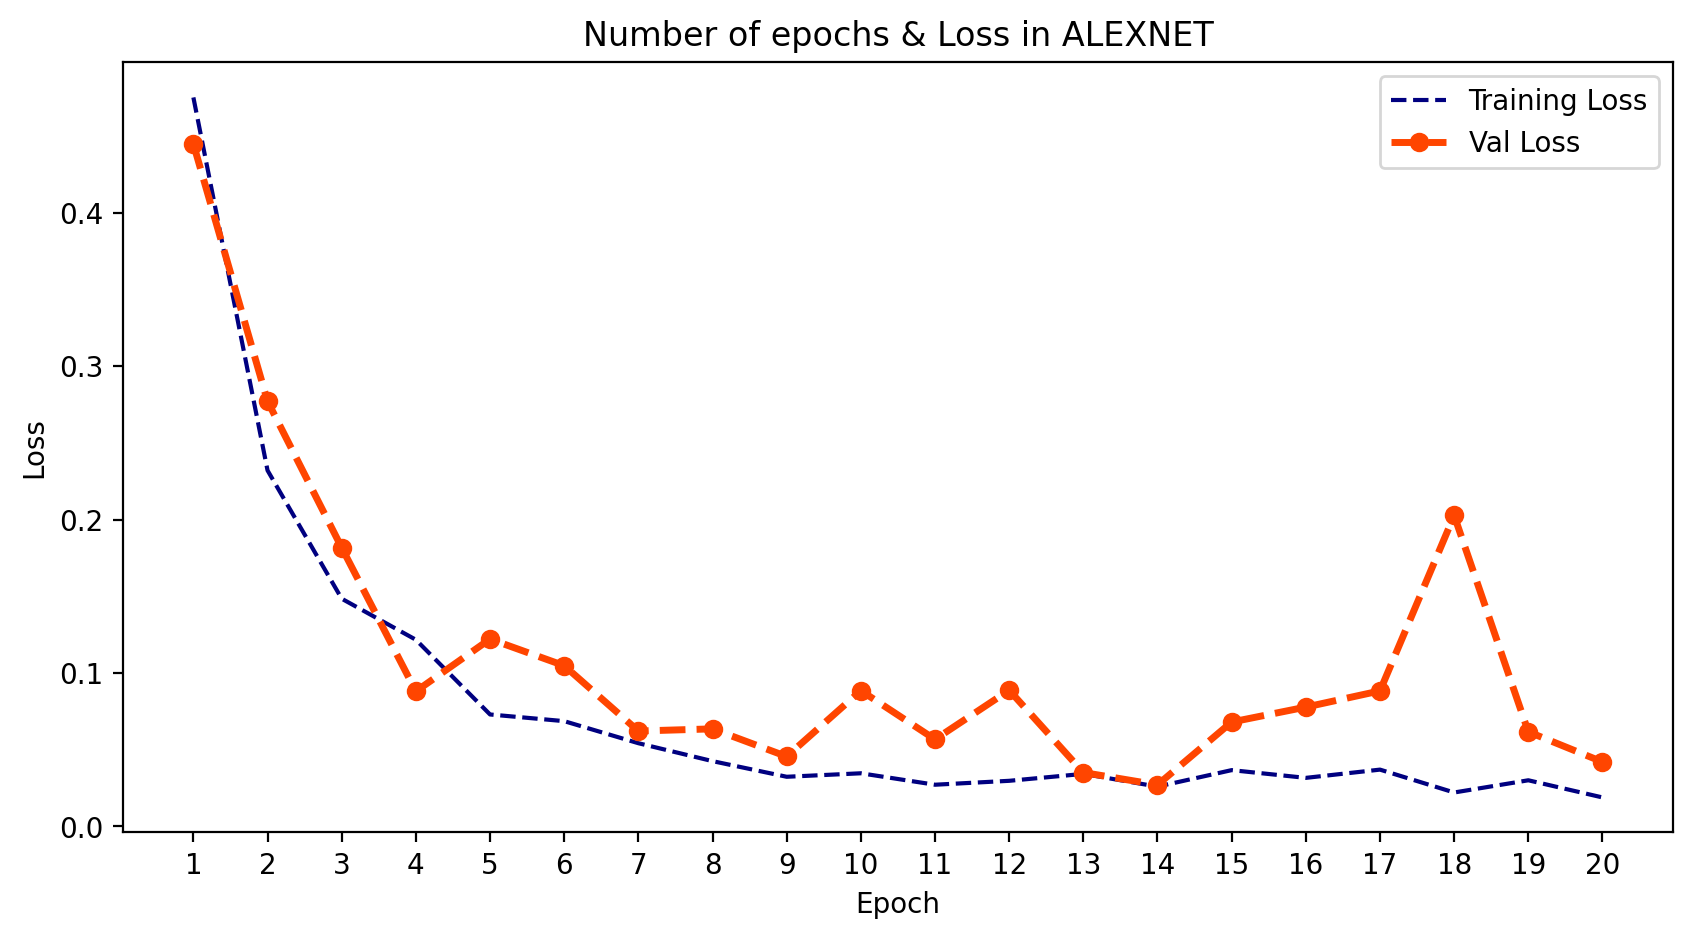

In [67]:
epoch_count = range(1, len(training_loss_alex) + 1)

# Visualize loss history
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_alex, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_alex, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

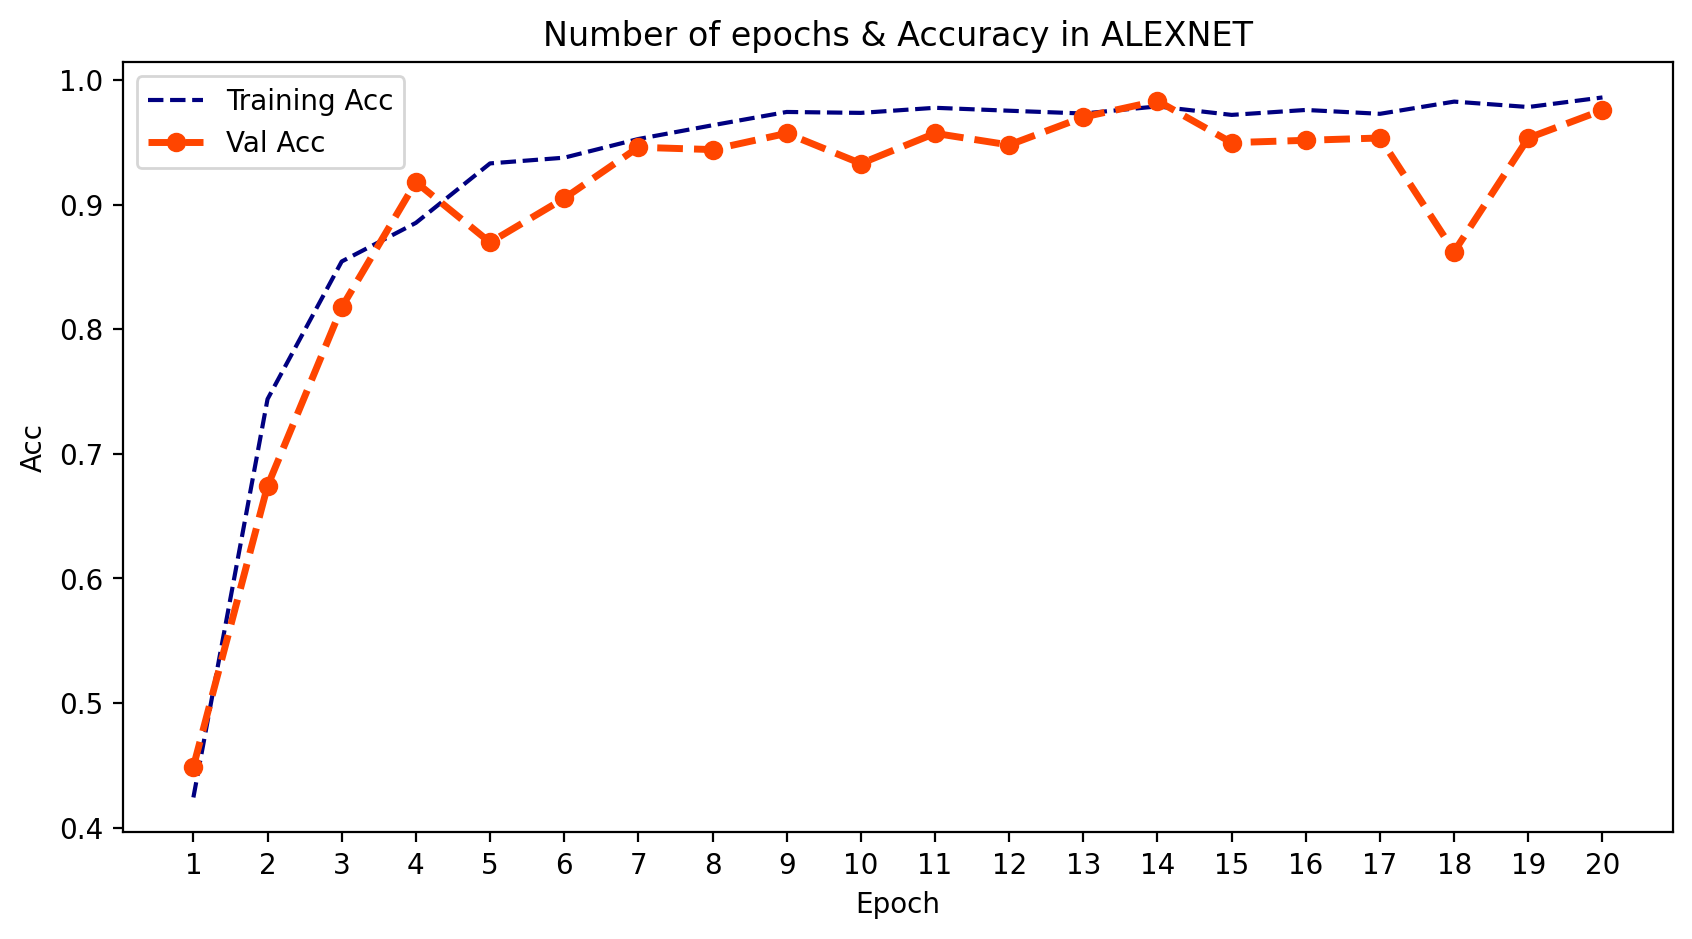

In [68]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_alex, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_alex, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

# **4. VGGNet**

In [23]:
def VGGNet():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(64, 3, 1, activation='relu')(inp)
    x = layers.Conv2D(64, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_VGG = models.Model(inputs=inp, outputs=x)

    return model_VGG

model_VGG = VGGNet()
model_VGG.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 238, 238, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 236, 236, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 236, 236, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 118, 118, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 116, 116, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 114, 114, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 114, 114, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 57, 57, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 55, 55, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 53, 53, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 51, 51, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 51, 51, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 23, 23, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 21, 21, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 19, 19, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │   169,873,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 194,312,261 (741.24 MB)

 Trainable params: 194,311,365 (741.24 MB)

 Non-trainable params: 896 (3.50 KB)

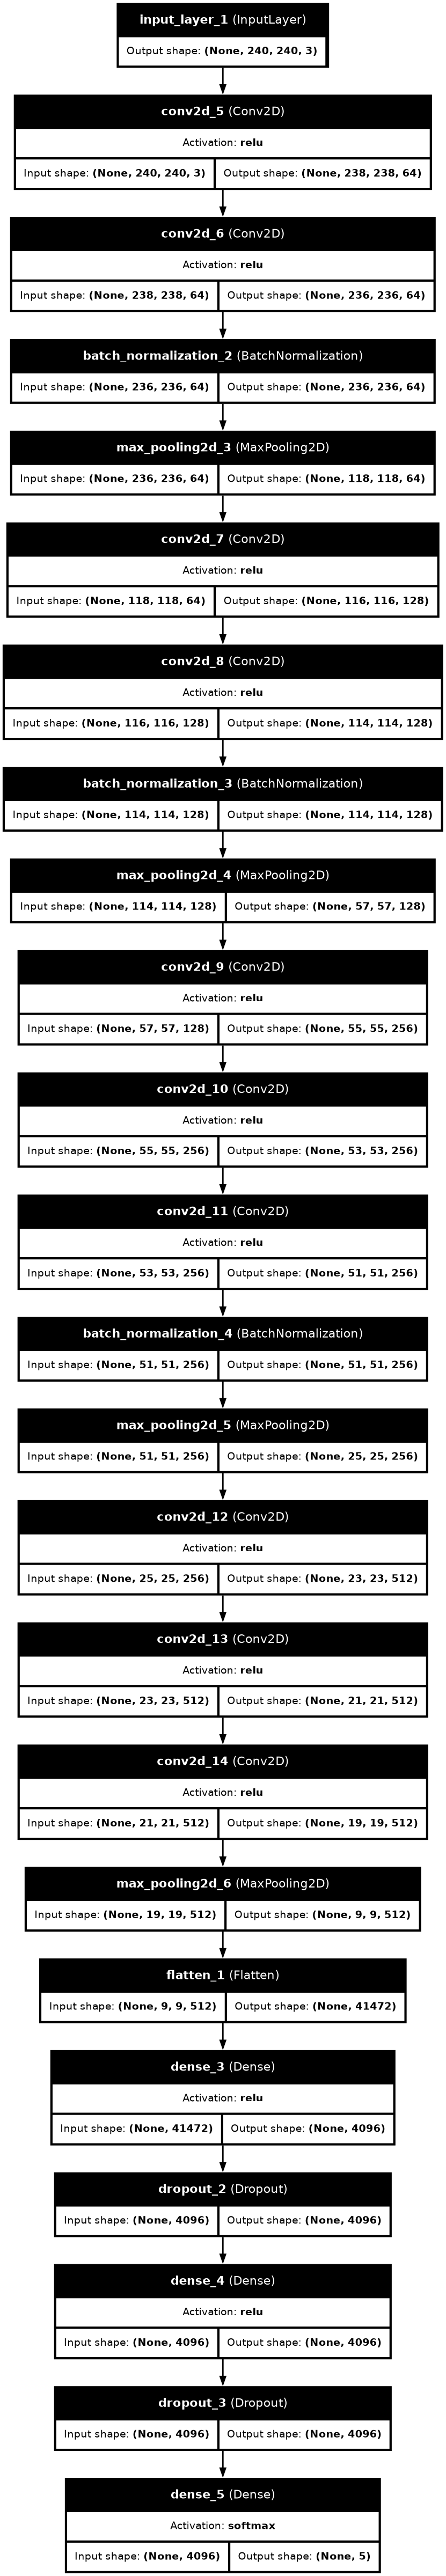

In [24]:
tf.keras.utils.plot_model(
    model_VGG,
    to_file='vgg_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [25]:
model_VGG.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
VGG_model = model_VGG.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20


I0000 00:00:1728254190.334795      95 service.cc:145] XLA service 0x7d5c58004f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728254190.334857      95 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1728254234.397330      95 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 55/127 ━━━━━━━━━━━━━━━━━━━━ 38s 537ms/step - accuracy: 0.2320 - loss: 8.9924

I0000 00:00:1728254263.756182      98 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_7', 164 bytes spill stores, 232 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_6', 64 bytes spill stores, 64 bytes spill loads



127/127 ━━━━━━━━━━━━━━━━━━━━ 120s 537ms/step - accuracy: 0.3148 - loss: 4.9876 - val_accuracy: 0.3073 - val_loss: 0.5101
Epoch 2/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 53s 400ms/step - accuracy: 0.8003 - loss: 0.2035 - val_accuracy: 0.2961 - val_loss: 0.7538
Epoch 3/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 52s 398ms/step - accuracy: 0.9190 - loss: 0.0916 - val_accuracy: 0.3724 - val_loss: 0.7910
Epoch 4/20
  3/127 ━━━━━━━━━━━━━━━━━━━━ 47s 384ms/step - accuracy: 0.9566 - loss: 0.0585

In [ ]:
training_loss_vgg = VGG_model.history['loss']
val_loss_vgg = VGG_model.history['val_loss']
training_acc_vgg = VGG_model.history['accuracy']
val_acc_vgg = VGG_model.history['val_accuracy']

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_vgg, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_vgg, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in VGGNET')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_vgg, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_vgg, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in VGGNET')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

# **5. ResNet**

In [76]:
def ResNet34 ():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(64, 7, 2,padding='valid', activation='relu')(inp)
    x = layers.MaxPooling2D(strides=2, padding='same')(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    
    
    x = layers.Conv2D(128, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
     
        
    x = layers.Conv2D(256, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    
    
    
    x = layers.Conv2D(512, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)
    
    
    
    
    model_Res = models.Model(inputs=inp, outputs=x)

    return model_Res

model_Res = ResNet34()
model_Res.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 117, 117, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 59, 59, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 59, 59, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 59, 59, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 59, 59, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 59, 59, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 15, 15, 256)    │         1,02

 Total params: 160,858,117 (613.63 MB)

 Trainable params: 160,850,437 (613.60 MB)

 Non-trainable params: 7,680 (30.00 KB)

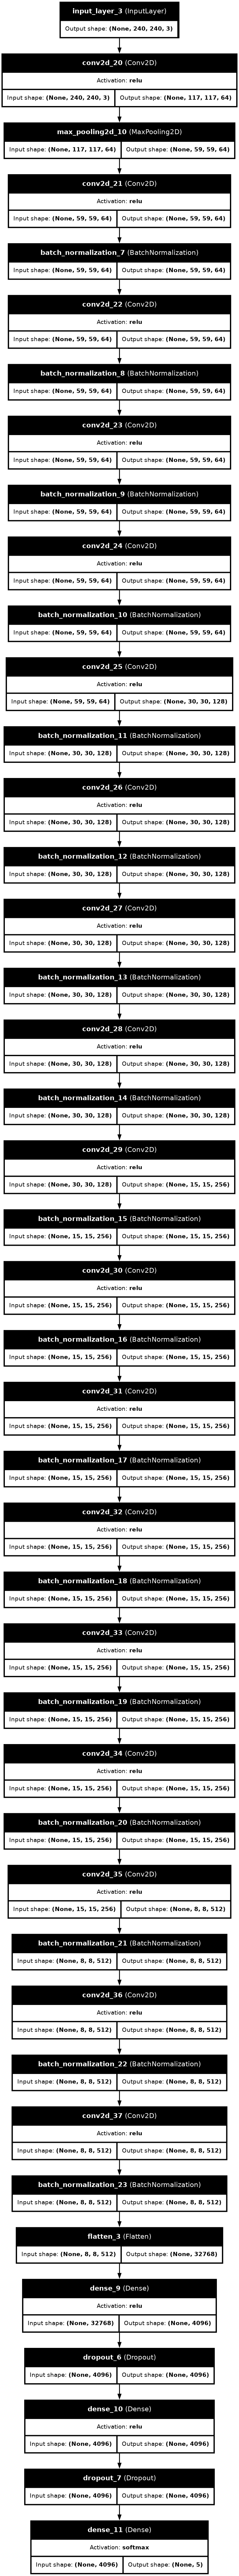

In [77]:
tf.keras.utils.plot_model(
    model_Res,
    to_file='res_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [78]:
model_Res.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [79]:
RES_model = model_Res.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 80s 404ms/step - accuracy: 0.2566 - loss: 1.1005 - val_accuracy: 0.1993 - val_loss: 9.0390
Epoch 2/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 297ms/step - accuracy: 0.2903 - loss: 0.4777 - val_accuracy: 0.2142 - val_loss: 4.9542
Epoch 3/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 294ms/step - accuracy: 0.3064 - loss: 0.4576 - val_accuracy: 0.3445 - val_loss: 0.4706
Epoch 4/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 292ms/step - accuracy: 0.3245 - loss: 0.4333 - val_accuracy: 0.3073 - val_loss: 0.4457
Epoch 5/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 307ms/step - accuracy: 0.3171 - loss: 0.4564 - val_accuracy: 0.2756 - val_loss: 1.2109
Epoch 6/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 303ms/step - accuracy: 0.3042 - loss: 0.4527 - val_accuracy: 0.2961 - val_loss: 1.0927
Epoch 7/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 304ms/step - accuracy: 0.3241 - loss: 0.4421 - val_accuracy: 0.2272 - val_loss: 1.1819
Epoch 8/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 307ms/step - accuracy: 0.2965 - loss: 0

In [80]:
training_loss_res = RES_model.history['loss']
val_loss_res = RES_model.history['val_loss']
training_acc_res = RES_model.history['accuracy']
val_acc_res = RES_model.history['val_accuracy']

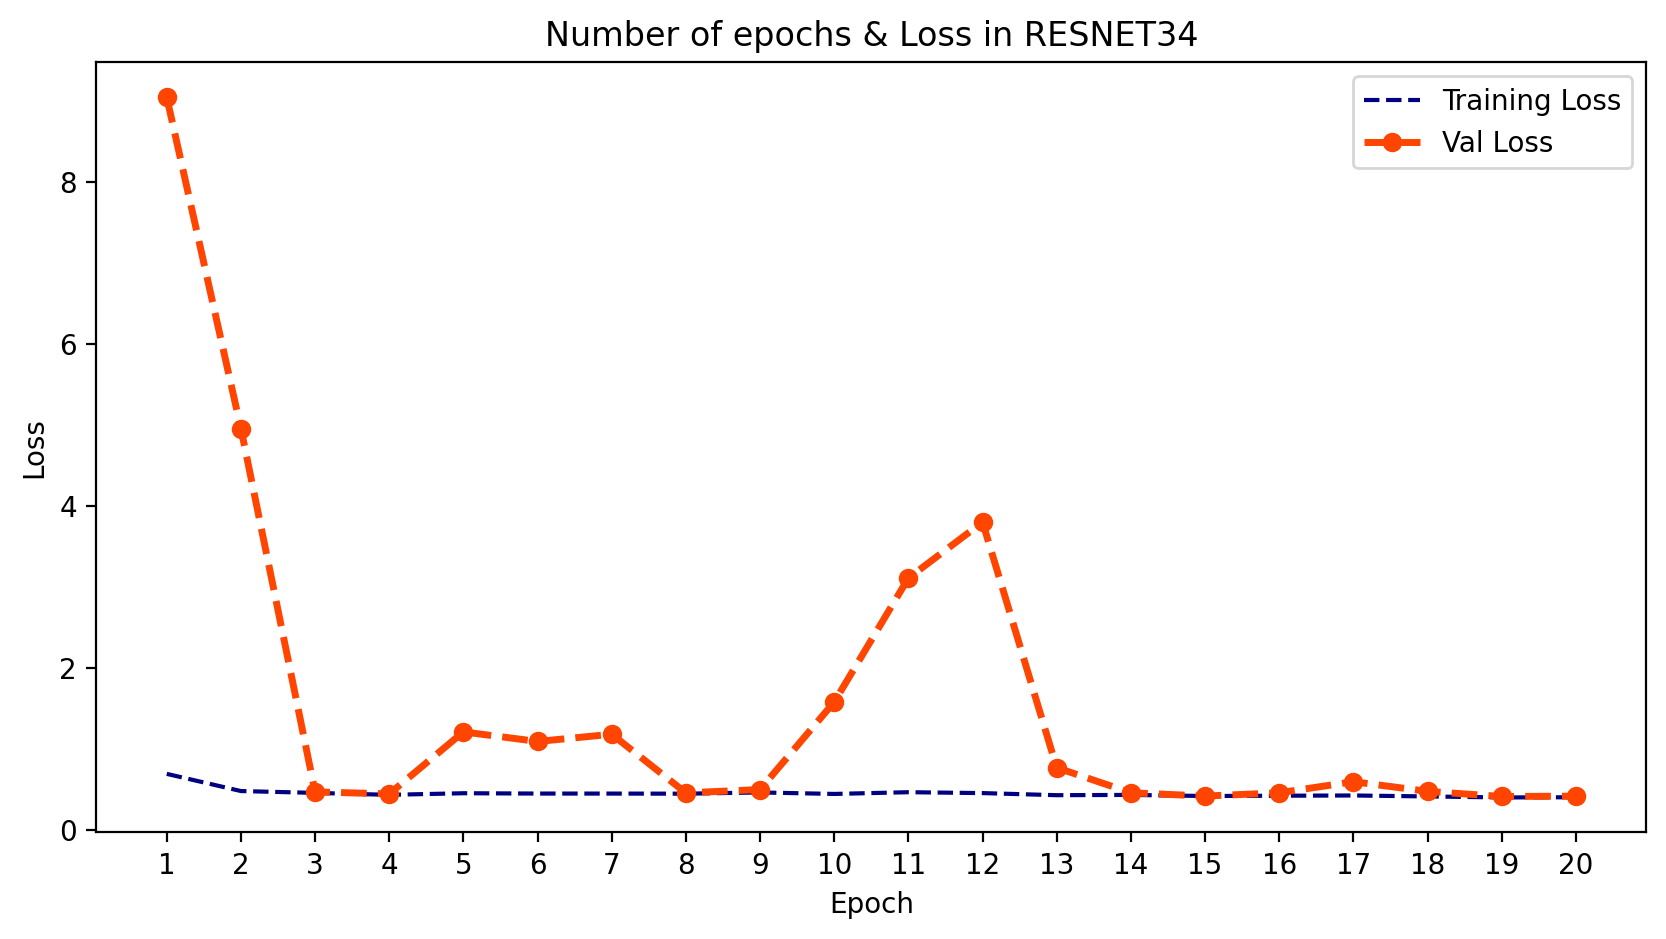

In [81]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_res, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_res, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in RESNET34')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

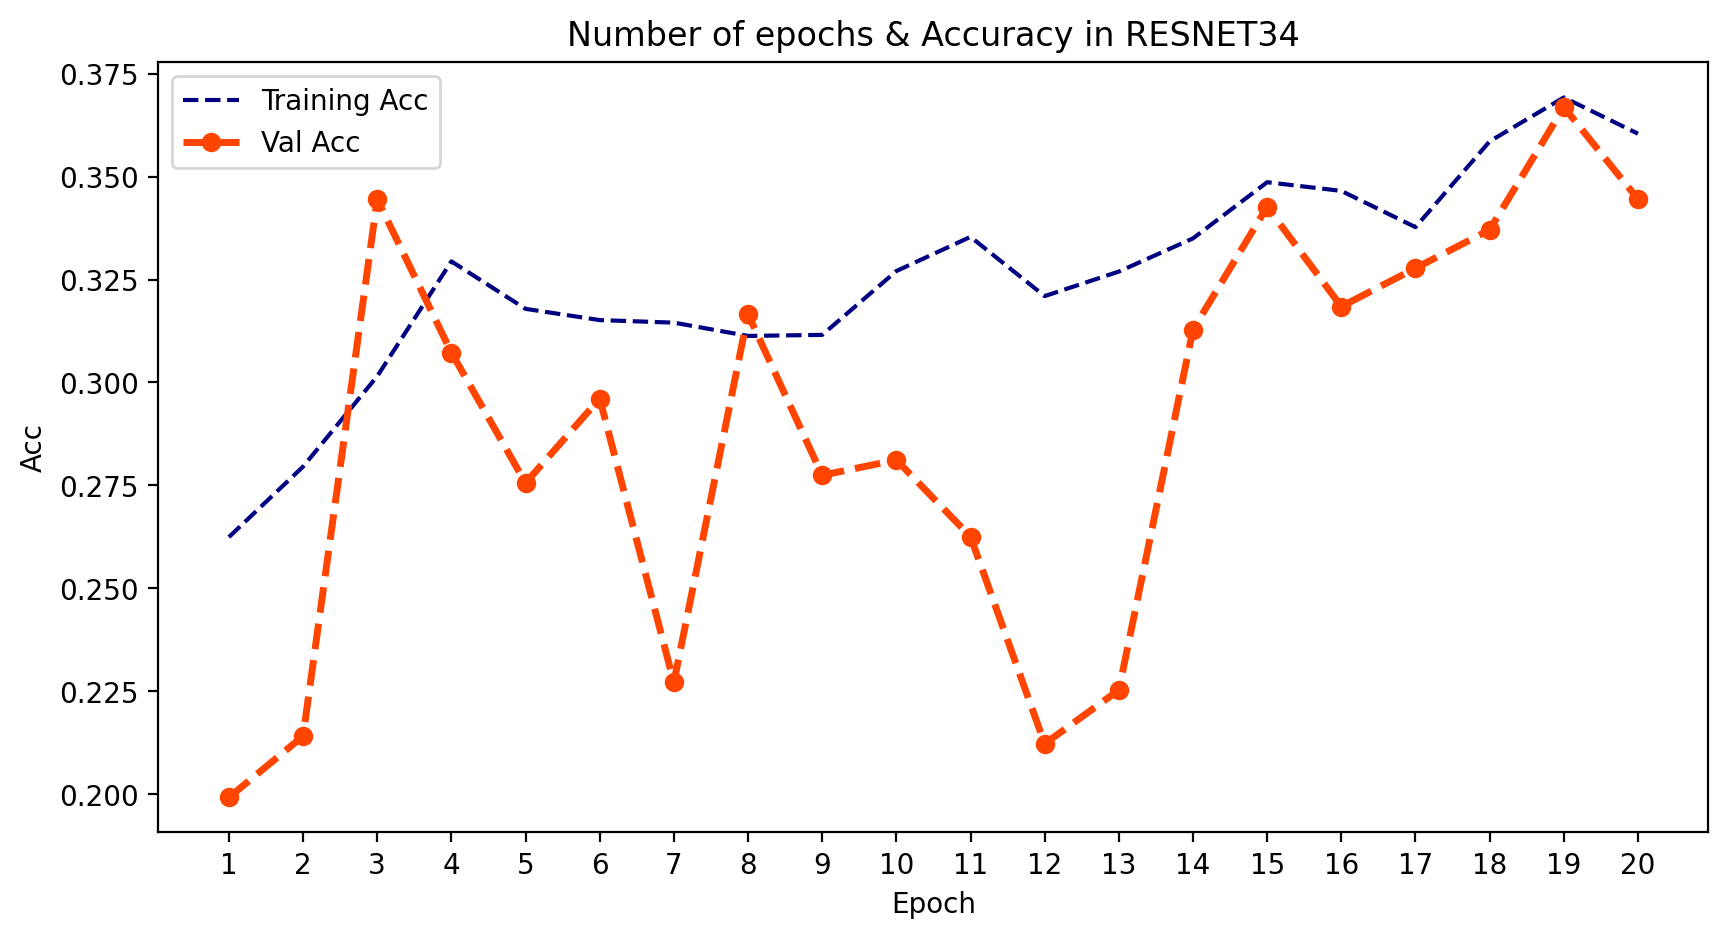

In [82]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_res, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_res, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in RESNET34')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

# 6. Result and Comparison

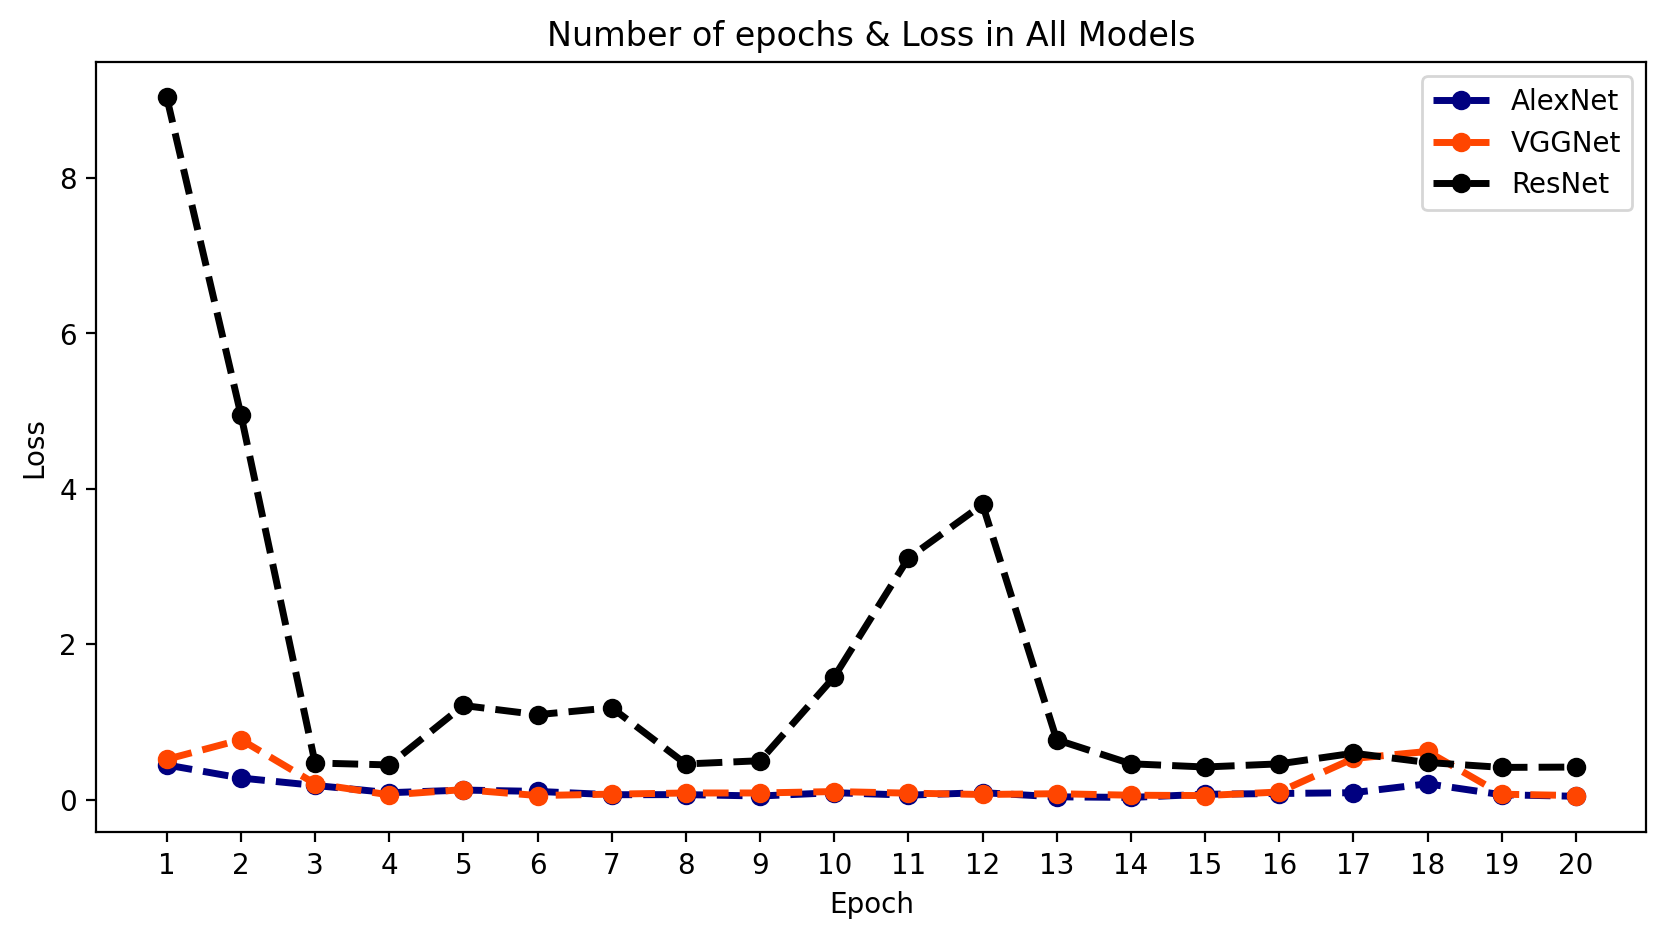

In [83]:
plt.figure(figsize=(10,5), dpi=200)

plt.plot(epoch_count, val_loss_alex, '--bo',color= 'navy',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_loss_vgg, '--bo',color= 'orangered',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_loss_res, '--bo',color= 'black',
         linewidth = '2.5', label='line with marker')
plt.legend(['AlexNet', 'VGGNet','ResNet'])
plt.title('Number of epochs & Loss in All Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

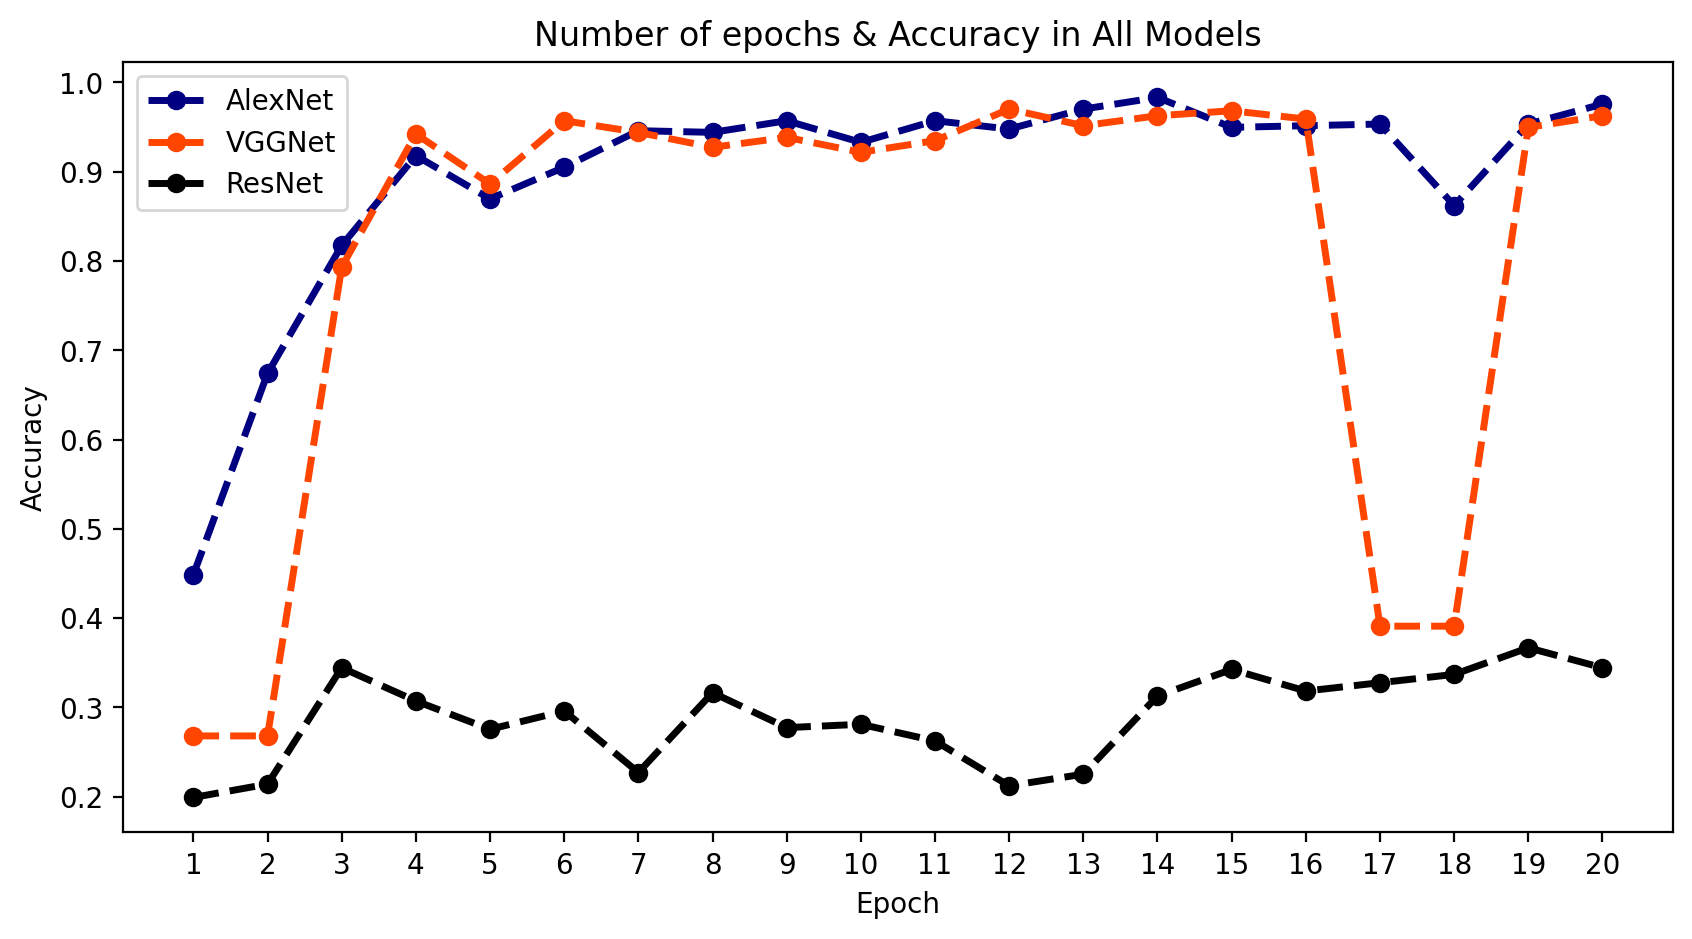

In [84]:
plt.figure(figsize=(10,5), dpi=200)

plt.plot(epoch_count, val_acc_alex, '--bo',color= 'navy',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_acc_vgg, '--bo',color= 'orangered',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_acc_res, '--bo',color= 'black',
         linewidth = '2.5', label='line with marker')
plt.legend(['AlexNet', 'VGGNet','ResNet'])
plt.title('Number of epochs & Accuracy in All Models')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,21,1))
plt.show();

In [85]:
# Save your models
model_Alex.save('alexnet_model.h5')
model_VGG.save('vgg_model.h5')
model_Res.save('resnet_model.h5')
